# Text Analysis Framework

After finishing data collection, I proceeded with text analysis with the following framework:
1. Hypothesis: 
First, I hypothesize that the most mentioned words when people comment on the birth policies will change at some level over time, although the reasons for the low birth rate could be assumed to be similar. <br><br>
2. Data selection and collection: 
To select data for analysis, for the timeframe, I chose 2021, 2022, and 2023 as the timeframe for recency. As for the text content to analyze, I chose Weibo as the source as it is the most popular social network in China (basically Twitter in China) to use as a proxy of people's opinions online. To further narrow down what to analyze, I leverage this website (Link: https://weibo.zhaoyizhe.com/#) by first typing in different keywords regarding a birth policy or raising children and selected the most popular posts for each year recorded on the "hot topic billboard" with related contents and performed web scrapping to obtain the comments under the original post. For the data collection methods, I created a script based on an existing Weibo crawler to deal with Weibo's anti-crawling algorithm, which updates often.<br><br>
3. Data cleaning and analysis: 
I performed sentimental analysis, word count ranking with word clouds, and TF-IDF to test my hypothesis.
First, for sentimental analysis, I compared the distribution plot of sentimental scores for the three years to see whether there were observable changes across time. Secondly, I conducted a simple word count ranking with word cloud as the visualization method to see overall what popular words were for the three years, whether there were changes, and infer possible reasons for the changes. Lastly, I used TF-IDF to filter out the most relevant words of each year, comparing the difference, exploring the causes, and interpreting the implications.
Data cleaning will be along the process while performing word count and TF-IDF. I leveraged the same package used for these analyses to perform tokenization, stop word removal, etc. As I was analyzing Chinese, I used the snownlp package for sentimental analysis, jieba package for tokenization, and further used sklearn.TfidfVectorizer package to vectorize the tokens.<br><br>
4. Conclusion: 
I summarized my finding in each step, wrote a comprehensive conclusion of all findings, and then stated the limitations and next steps for further analysis.

# Step 0: Import necessary libraries

In [1]:
# import all needed libraries
# use snownlp for sentimental analysis
# use sklearn for TF-IDF
# use jieba for tokenization
# !pip install snownlp 
# !pip install jieba
from snownlp import SnowNLP
from snownlp import sentiment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import jieba
import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from wordcloud import WordCloud
# import altair as alt -> this is only used for the last step of visualizing TF-IDF

# Step1: Load Data

In [2]:
# create function to get content
def get_content(content_path):
    with open(content_path,'r', encoding = 'utf-16', errors = 'ignore') as f:
        content= ''
        for i in f:
            i = i.strip()
            content += i
    return content

In [3]:
files = glob.glob('*.txt')
directory_path = "weibo by year/" 
# please refer to the folder weibo by year for the data I scrapped and organized for analysis
text_files = glob.glob(f"{directory_path}/*.txt")
corpus_files = [get_content(x) for x in text_files]
text_titles = [Path(text).stem for text in text_files] 
text_files # check files

['weibo by year/2023.txt', 'weibo by year/2022.txt', 'weibo by year/2021.txt']

# Step 2: Sentimental Analysis 

In [4]:
# Note: for snownlp, the sentimemtal score is [0,1] with 0.5 being neutral
# Calculate the sentimetal score of each comment of each document
corpus_for_sentiment = [x for x in corpus_files]
lists = [[SnowNLP(ii).sentiments for ii in i] for i in corpus_for_sentiment]

# Calculate the average score of each document 
avg_list = []
a = 0
for i in lists:
    avg_list.append(np.mean(lists[a]))
    a += 1
avg_list


[0.5238757724452882, 0.521439958550299, 0.5255004009107317]

In [5]:
# combine the by document sentimental scores in to a 2-d list to draw a distribution plot for all comments regardless of year
full_list = []
for sublist in lists:
    new_list = []
    for item in sublist:
        new_list.append(item)
    full_list.append(new_list)

[Text(0.5, 1.0, 'Distribution of sentimental analyis - all years')]

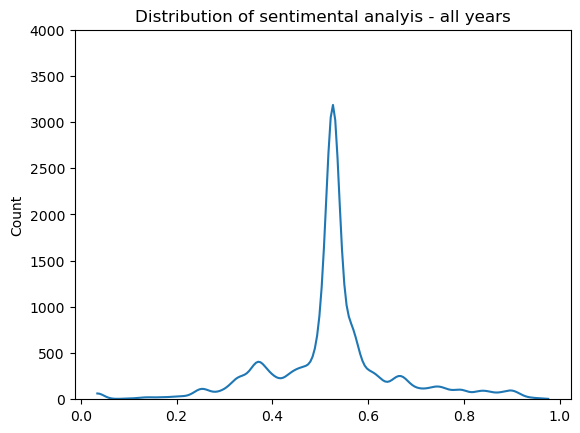

In [6]:
# Draw the distribution plot for sentim ental score for all comments (regardless of year)
flat_list = [item for sublist in full_list for item in sublist]
data = flat_list
#create density curve to visualize distribution of values
plt.ylim(0,4000)
sns.histplot(data, edgecolor="none", alpha= 0.0,  kde= True).set(title='Distribution of sentimental analyis - all years')



<b>Conclusion</b>:
The average score is around 0.52 when combining three years, which is a bit higher than neutral (slightly positive), contradicting the intuition of people is not supportive of the policies. However, when we look at the distribution chart above, we can see that despite a high peak around 0.5, meaning most comments are scored as neutral, the other smaller but obvious peak is around 0.35~0.4. Meanwhile, positive comments are more scattered compared to negative ones. The implication here is that although people might not be satisfied with the policies, no "harsh words" were used to criticize the government policies as snownlp was trained on a Taobao (China’s Amazon) dataset for sentimental analysis, where people are more direct when complaining or criticizing online shop owners.

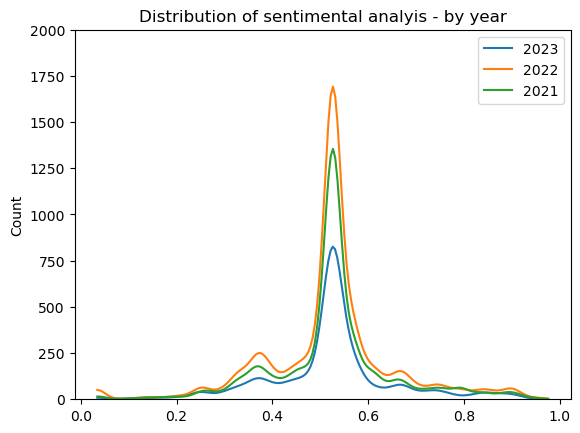

In [7]:
# Draw the distribution plot for sentimental score by year
# documentation: https://seaborn.pydata.org/tutorial/distributions.html
# create a list of datasets to plot
# datasets = [sns.load_dataset("tips").total_bill, sns.load_dataset("tips").tip]

# Create a grid of subplots
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Loop through the data sets and draw a histplot on each subplot
for i, data in enumerate(full_list):
    row = i // 4
    col = i % 4
    sns.histplot(data, edgecolor="none", alpha= 0.0,  kde= True).set(title='Distribution of sentimental analysis - by year')
# sns.displot(data, kind='kde')
    plt.legend(loc="upper right", labels= text_titles)

# Show the plot
plt.ylim(0, 2000)
plt.show()



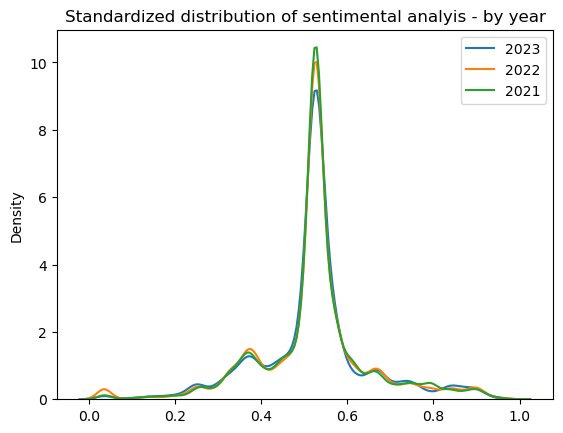

In [12]:
# As the amount of data is diffrent for each year, I also used kdeplot to further standardized the distiribution for ease of comparision
for i in full_list:
    sns.kdeplot(i).set(title='Standardized distribution of sentimental analysis - by year')
plt.legend(loc="upper right", labels= text_titles)
# I'm not sure why but if I run it through a loop, the distributions are standardized

In [25]:
# run statistics desscription to compare
full_list_df = pd.DataFrame(full_list)
full_list_df = full_list_df.T.rename(columns={0: "2023", 1: "2022", 2: "2021"})
full_list_df.describe()
# The distribution are fairly similar for the three years
# the min value is the same for each year, I took a look at the ones with these comments and came to the conclusion that it is due to that these comments are short with similar negative words
# Note: data for 2023 is fewer as we are only in the second quarter of 2023

,2023,2022,2021
count,15483.000000,36328.000000,31136.000000
mean,0.523876,0.521440,0.525500
std,0.130968,0.135697,0.128295
min,0.034483,0.034483,0.034483
25%,0.490272,0.487535,0.500000
50%,0.526233,0.526233,0.526233
75%,0.562500,0.564103,0.564948
max,0.965517,0.975610,0.975610


<b>Conclusion</b>: The shape of the distribution is quite similar across the years. Overall, no big difference can be identified through the graph, which the statistical description also supported. However, looking closely, we can see that 2022 has a small peak at a more negative score (around 0.3,). This is even clearer in the second graph, “Standardized distribution of sentimental analysis - by year.” The reason for such a phenomenon is that one of the most discussed Weibo of the year is a report published by the government stating that fertile women were giving less birth. Some people considered the report as pointing fingers at women for low birth rate, ignoring other social factors, which I further deep-dived in the discussed content in the TF-IDF part.

# Step 3: Create stop word list

In [33]:
# Step3: create stopword list: swl
with open('stopwords.txt', 'r', encoding = 'utf-16') as f: # I prepared a stopword list in Chinese in the txt file
    lines = f.readlines()
    swl= list()
    for i in lines:
        i = i.replace('\n','')
        swl.append(i)
# swl

# Step 4: tokenize and remove stop word 

In [14]:
# Step4: tokenize and remove stop word with my stop word list (swl) by document through a loop
corpus_list = []
a=0
for i in corpus_files:
    corpus_string = ''.join(i)
    split_words = [x for x in jieba.cut(corpus_string)]
    filtered_words = [word for word in split_words if word not in swl]
    corpus_list.append(filtered_words)
    a += 1

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/92/dd2dtnsn4l77d06s5jjtcfcc0000gn/T/jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


In [15]:
# create 3 indiviual list for each document to perform word count and draw 3 word clouds
for i, lst in enumerate(corpus_list):
    new_list_name = f"list_corpus_{i}"
    vars()[new_list_name] = lst  

# Step 5: Word Count Ranking 

In [16]:
# Create a function to calculate word count (how many times a certain word appears)
def get_TF(k, words):
    tf_dic = {}
    for i in words:
        tf_dic[i] = tf_dic.get(i,0)+1
    return sorted(tf_dic.items(), key = lambda x:x[1],reverse = True)[:k]

In [17]:
# create word count list
word_count_list = []
for i in corpus_list:
    TF = get_TF(50,i)
    word_count_list.append(TF)
word_count_list

[[('孩子', 109),
  ('高中', 55),
  ('钱', 49),
  ('政策', 45),
  ('三胎', 33),
  ('建议', 31),
  ('鼓励', 30),
  ('十几年', 26),
  ('生育', 24),
  ('养老', 23),
  ('幼儿园', 23),
  ('工作', 22),
  ('国家', 21),
  ('学费', 21),
  ('不生', 20),
  ('结婚', 20),
  ('教育', 19),
  ('房价', 19),
  ('研究', 17),
  ('二胎', 17),
  ('父母', 16),
  ('年轻人', 16),
  ('计划生育', 14),
  ('三孩', 14),
  ('医疗', 13),
  ('工资', 12),
  ('有钱', 12),
  ('人口', 12),
  ('劳动力', 11),
  ('生娃', 11),
  ('专家', 11),
  ('大学', 11),
  ('就业', 10),
  ('发钱', 10),
  ('前', 10),
  ('两个', 10),
  ('关注', 9),
  ('家庭', 9),
  ('费用', 9),
  ('大饼', 9),
  ('能生', 8),
  ('老百姓', 8),
  ('压力', 8),
  ('小孩', 8),
  ('夫妻', 8),
  ('忽悠', 8),
  ('考上', 8),
  ('政府', 8),
  ('劳动法', 7),
  ('一个月', 7)],
 [('孩子', 251),
  ('生育', 118),
  ('钱', 77),
  ('教育', 76),
  ('二胎', 66),
  ('结婚', 63),
  ('工作', 53),
  ('三胎', 48),
  ('不生', 47),
  ('生二胎', 45),
  ('人口', 45),
  ('国家', 45),
  ('一个月', 43),
  ('女人', 43),
  ('旺盛期', 40),
  ('政策', 37),
  ('家庭', 33),
  ('房价', 33),
  ('社会', 32),
  ('压力', 32),
  ('妇女', 31),
  ('男人'

# Step 6: Word Cloud 文字云
For word cloud, I used word count to rank but not TF-IDF to demonstrate the difference of the two type of calculations, I will conclude the difference in the conclusion sections

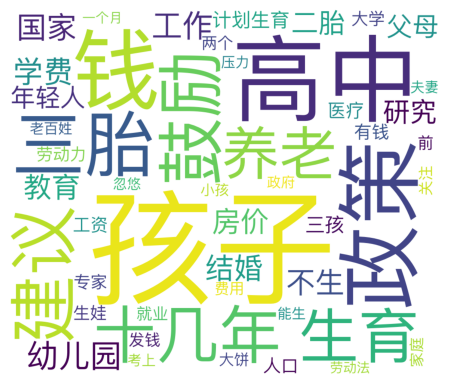

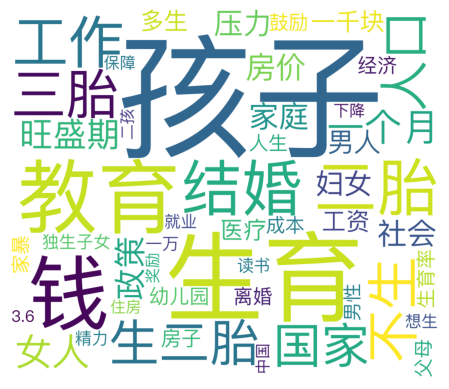

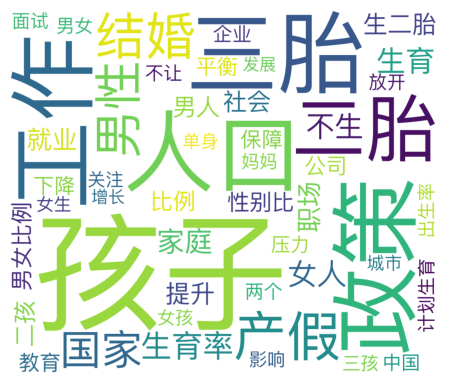

In [30]:
# Create word clouds
for TF in word_count_list:
    TF_dic = dict((x, y) for x, y in TF)
    wc = WordCloud(font_path='/System/Library/fonts/PingFang.ttc', background_color="white", width=1000, height=860)  
    wen = wc.generate_from_frequencies(TF_dic)
    
    # Display the wordcloud
    plt.figure()
    plt.imshow(wen)
    plt.axis("off")
    plt.show()
    # see next cell for translation

Word cloud content with translation graph
<img src="2021_word_cloud.png">
<img src="2022_word_cloud.png">
<img src="2023_word_cloud.png">

<b>Conclusion</b>: The most appeared words across the three years are straightforward and similar: children, second/third child, work, marriage, money, etc. These are all common words when discussing life plans. In short, the most frequent words with regard to birth-policy are similar among the three years. However, I continued with TF-IDF to reflect the important words for respective years.

# Step 7: TF-IDF

In [34]:
# Step 7.1: Tokenizing & removing stop word with my swl
corpus_list = []
a=0
for i in corpus_files:
        corpus_string = ''.join(i)
        split_words = [x for x in jieba.cut(corpus_string)]
        filtered_words = [word for word in split_words if word not in swl]
        corpus_list.append(filtered_words)
        a += 1

len(corpus_list)

3

In [35]:
# Step 7.2: create a flat word list to create tfidf table
# TD-IDF from scratch: https://www.askpython.com/python/examples/tf-idf-model-from-scratch
flat_corpus_list = []
word_set = []
for sublist in corpus_list:
    for element in sublist:
        flat_corpus_list.append(element)
print(len(flat_corpus_list))
word_set = set(flat_corpus_list)
print(len(word_set))
flat_corpus_list
#Total documents in our corpus
total_documents = len(corpus_list)
print(total_documents)

18469
6324
3


In [36]:
#Step 7.3: Creating an index for each word in our vocab. 
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1
# index_dict 

In [37]:
#Step 7.4: Create a count dictionary
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(corpus_list)

In [24]:
#Step 7.5: Create a function to calculate the tf_idf score
# Define function of: Term Frequency/Inverse Document Frequency/TF-IDF
# I created these functions because my words are a list

# (1)Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N


# (2)Inverse Document Frequency
 
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

# (3)Combining the TF-IDF functions
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
        value = tf*idf
        tf_idf_vec[index_dict[word]] = value
    return tf_idf_vec

In [38]:
# Step 7.6: TF-IDF Encoded text corpus
vectors = []
for sent in corpus_list:
    vec = tf_idf(sent)
    vectors.append(vec)
# print(vectors[0])

In [47]:
# Step 7.7: Create the TF-IDF df
# Citation: from class note
tfidf_df = pd.DataFrame(vectors, index=text_titles, columns=index_dict) 
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term'})
# removing new stop words manually
mask = tfidf_df['term'].isin(['几分钟','不信','默认','率','搜','刷','倍','块','画','免','需','👏','饼','热','舒服','依法','恶心'])
tfidf_df = tfidf_df[~mask]
tfidf_df.sort_values('tfidf')
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
# Note: 

,document,term,tfidf
17771,2021,成都,0.002294
14650,2021,人口普查,0.000471
16644,2021,不招,0.000412
18273,2021,私企,0.000412
13105,2021,简历,0.000353
14688,2021,责任,0.000353
16180,2021,犯罪率,0.000353
17285,2021,年龄段,0.000353
17534,2021,催婚,0.000353
13233,2021,总体,0.000294


In [48]:
# Step 7.8: Select the top TF-IDF words
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf.head(50)

,document,term,tfidf
17771,2021,成都,0.002294
14650,2021,人口普查,0.000471
16644,2021,不招,0.000412
18273,2021,私企,0.000412
13105,2021,简历,0.000353
14688,2021,责任,0.000353
16180,2021,犯罪率,0.000353
17285,2021,年龄段,0.000353
17534,2021,催婚,0.000353
13233,2021,总体,0.000294


In [52]:
# Step 7.9: Draw heat map of top_tfidf
# code from class
import altair as alt

term_list  = ['人口普查', '3.6', '催婚', '私企', '年龄段', '人口减少','涨工资','发钱','义务教育'] # change manually based on result of previous cell
# transalation


top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001


# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)


# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode( # include a circle with a size of 100
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list), 
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 400, height = 300)

alt.LayerChart(...)

TF-IDF with translation graph
<img src="TF-IDF translate.png">

<b>Conclusion</b>:<br>
For 2021: If we define “hot word” as TF-IDF score over 0.0015 as significant, the significant word of the year is Chengdu. The reason is that during the period, another news about a Chengdu high school student fell from a building (reason unspecified to this date.) This incident held much mystery with conspiracies. People felt that the topic of birth rate should not take over the public’s focus. <br>
Beyond the word, the other words are population census, private sector, age, and other work-related words. This year, people’s discussions about giving a child were more about their concerns about raising a child, especially for women. People’s main concern was that private sector companies were more inclined not to hire women at a certain age range with family responsibilities. <br><br>
For 2022: China's National Health Commission published news about "the annual average reduction of women in their peak reproductive years is 3.4 million."
As "women" is specified in the news title, people felt it was insinuating that women were responsible for the low birth rate and population decrease, which induced discussion on women's rights. In response, the government of Zhejiang Province surveyed people's willingness to raise another child if the government provided 1000 RMB monthly for each child since birth for three years, which is 36k (3.6万) in total, and people responded that it is just a drop in the bucket(杯水车薪) which classified as negative attitudes.<br><br>
For 2023: The most discussed birth-rate-related policy in 2023 (till March) is that the government of Shandong province plans to provide free high-school education. (China’s mandatory education is to middle age.) People are sarcastic about the policy as families can only enjoy the policy benefit after a decade(十几年) when the newborn turn 15. Some even say they don't think their future children can pass the high school entrance exam and prefer cash right now, or they will just go bankrupt first. Also, some are concerned about whether policies with such a time gap could be implemented, feeling like it might be a promise that cannot be fulfilled.

# Conclusion & Next Step

The main conclusion of the analysis is that there is not much difference across the three years in people's overall attitudes. The keywords are similar as well. Looking into the year-significant words, we can see that the discussions are initiated from governmental news and are drained down to the daily life worries of career plans, family plans, and whether society supports family-oriented decisions despite intense competition in the job market. Weibo serves as a quick reflection spot for people commenting on new topics but lacking discussion with depth. Hence, the next step for the analysis is to be more informative and solid. I plan to increase the amount of Weibo comments for better quantitative analysis by adding more years and restructuring the analysis method for Zhihu comments to obtain people’s deeper thoughts on the topic.

# Limitations

This analysis is limited in several aspects. First, the selection of Weibos could be improved by ensuring that there is relatively the same amount from each month through the year, making the comments smoothly distributed within each year. Due to time and computer limitations, I focus on the most popular birth-related Weibo each year, not necessarily collecting data to represent a general attitude toward the topic. Second, as mentioned in the next step, comments on Weibo tend to be shorter and shallower, which could be ameliorated by including data from Zhihu due to its structure of posts and replies. Lastly, the sentimental analysis model of snownlp was trained on a Taobao dataset, so it might be more accurate in identifying online selling/buying attitudes. Still, it might not be tailored for social discussions like birth rate. If time and skills allow, I would like to train my model on sentimental analysis of people’s attitudes toward these topics and consider how the Chinese tend to be more conservative in words when discussing the government through scaling.

# Appendix
This part consists of some works I tried during analysis but discard eventually

In [9]:
# different types of sentimental analysis chart

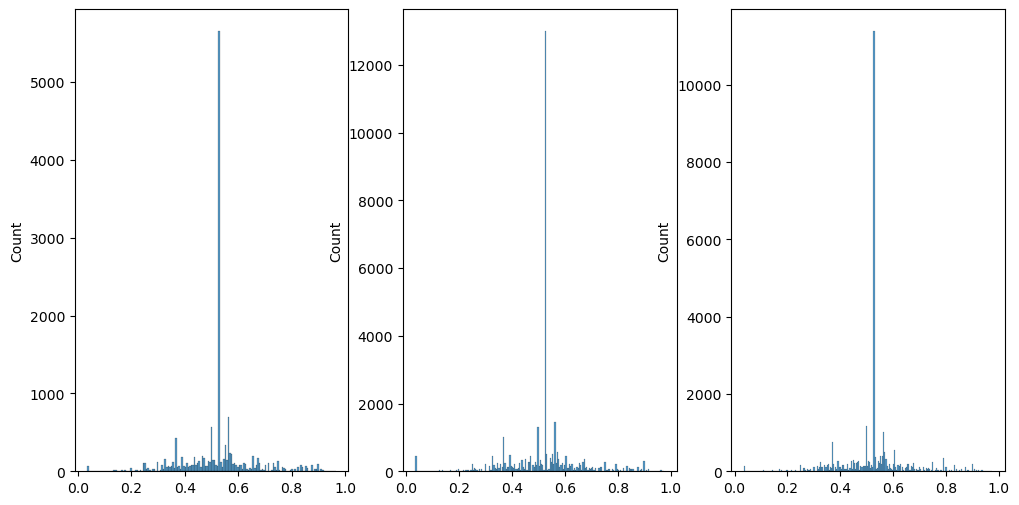

In [16]:
# 绘制舆情分数分布图 - by document
# I self-designed these functions
# Create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
# Plot a distplot for each list on a separate subplot
# Reshape axs to be a one-dimensional array
# axs = axs.reshape(-1)
for i,data  in enumerate(full_list):
    sns.histplot(data, ax=axs[i])
# Set the title for each subplot
# Show the plot
plt.show()

In [ ]:
# Step7.1: word list & flatten world list
# I self-designed these functions
# the word list contains unique tokens in the documents
# the flatten word list is just making word list a 1-d list
wl = []
a=0
for i in corpus_files:
    corpus_string_2 = ''.join(i)
    split_words = [x for x in jieba.cut(corpus_string_2)]
    filtered_words = [word for word in split_words if word not in swl]
    wl.append(filtered_words)
    a += 1

flat_wl = [item for sublist in wl for item in sublist]

In [ ]:
# word_count_list_top10 = word_count_list[0][:10] +word_count_list_top10 + word_count_list[1][:10]+word_count_list_top10 + word_count_list[2][:10]
# word_count_list_top10 = list(zip(*word_count_list_top10))[0]
# # remove duplicate
# word_count_list_top10 = list(dict.fromkeys(word_count_list_top10))
# top_word_count_translate = pd.DataFrame(word_count_list_top10).head(10)
# top_word_count_translate = top_word_count_translate.rename(columns={0: "term"})
# # manual translation
# top_word_count_translate = top_word_count_translate.assign(translation = ['children','high school', 'money', 'policy', 'third child', 'suggestion','encourage','over 10 years', 'birth','elderly care'])
# top_word_count_translate